In [56]:
# "D:\GIT_HUB\12_Final_Projects_of_all\01_Analysis\Dataset\sleep_health_lifestyle_dataset.csv"

In [57]:
# Sleep Health & Lifestyle Analysis - Exploratory Data Analysis
# Part 1: Data Loading, Cleaning,and Initial Exploration


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [59]:
# ===========================
# 1.A. DATA LOADING
# ===========================

# Load the dataset
df = pd.read_csv("D:\\GIT_HUB\\12_Final_Projects_of_all\\01_Analysis\Dataset\\sleep_health_lifestyle_dataset.csv")


In [60]:


# ========================================================
# 1.B. DATA CLEANING: COLUMN RENAMING (THE FIX)
# ========================================================
# We create a map of the "long" names from the CSV to the
# "short" names used in your analysis script.

column_rename_map = {
    'Person ID': 'Person_ID',
    'Sleep Duration (hours)': 'Sleep Duration',
    'Quality of Sleep (scale: 1-10)': 'Quality of Sleep',
    'Physical Activity Level (minutes/day)': 'Physical Activity Level',
    'Stress Level (scale: 1-10)': 'Stress Level',
    'Blood Pressure (systolic/diastolic)': 'Blood Pressure',
    'Heart Rate (bpm)': 'Heart Rate'
}

df = df.rename(columns=column_rename_map)

print("=" * 60)
print("Columns successfully renamed!")
print("New column names:", df.columns.tolist())
print("=" * 60)


Columns successfully renamed!
New column names: ['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


In [61]:

# ===========================
# 1.C. DATASET OVERVIEW (Original Section 1)
# ===========================

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

# Display first few rows
print("\n" + "=" * 60)
print("FIRST 5 ROWS (with new column names)")
print("=" * 60)
df.head()




Dataset Shape: (400, 13)
Number of Records: 400
Number of Features: 13

FIRST 5 ROWS (with new column names)


,Person_ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [62]:

# Data types
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes)


DATA TYPES
Person_ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep           float64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [63]:

# ===========================
# 2. DATA QUALITY CHECK
# ===========================

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_results = missing_df[missing_df['Missing_Count'] > 0]

if missing_results.empty:
    print("No missing (NaN) values found.")
else:
    print(missing_results)

# Check for duplicates
print("\n" + "=" * 60)
print("DUPLICATE CHECK")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



MISSING VALUES ANALYSIS
                Missing_Count  Percentage
Sleep Disorder            290        72.5

DUPLICATE CHECK
Number of duplicate rows: 0


In [64]:

# ===========================
# 3. BASIC STATISTICS
# ===========================

print("\n" + "=" * 60)
print("NUMERICAL FEATURES STATISTICS")
print("=" * 60)
# This will now correctly describe the renamed columns
df.describe()



NUMERICAL FEATURES STATISTICS


,Person_ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,115.614301,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,100.750000,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,200.500000,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,300.250000,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


In [65]:

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES DISTRIBUTION")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")



CATEGORICAL FEATURES DISTRIBUTION

Gender:
Gender
Female    201
Male      199
Name: count, dtype: int64
Unique values: 2

Occupation:
Occupation
Student          110
Office Worker     99
Manual Labor      96
Retired           95
Name: count, dtype: int64
Unique values: 4

BMI Category:
BMI Category
Overweight     109
Underweight    102
Obese           98
Normal          91
Name: count, dtype: int64
Unique values: 4

Blood Pressure:
Blood Pressure
109/60    17
110/60     6
111/60     6
112/60     5
119/66     4
          ..
114/64     1
122/62     1
136/95     1
134/86     1
134/92     1
Name: count, Length: 250, dtype: int64
Unique values: 250

Sleep Disorder:
Sleep Disorder
Insomnia       79
Sleep Apnea    31
Name: count, dtype: int64
Unique values: 2


In [66]:

# ===========================
# 4. TARGET VARIABLE ANALYSIS
# ===========================

print("\n" + "=" * 60)
print("SLEEP DISORDER DISTRIBUTION")
print("=" * 60)
sleep_disorder_dist = df['Sleep Disorder'].value_counts()
print(sleep_disorder_dist)
print(f"\nPercentage Distribution:")
print((sleep_disorder_dist / len(df) * 100).round(2))

print("\n" + "=" * 60)
print("SLEEP QUALITY DISTRIBUTION")
print("=" * 60)
# This will now work
quality_dist = df['Quality of Sleep'].value_counts().sort_index()
print(quality_dist)



SLEEP DISORDER DISTRIBUTION
Sleep Disorder
Insomnia       79
Sleep Apnea    31
Name: count, dtype: int64

Percentage Distribution:
Sleep Disorder
Insomnia       19.75
Sleep Apnea     7.75
Name: count, dtype: float64

SLEEP QUALITY DISTRIBUTION
Quality of Sleep
1.0      5
1.7      2
2.0      3
2.3      1
2.4      1
        ..
9.4      3
9.5      2
9.7      1
9.8      1
10.0    15
Name: count, Length: 79, dtype: int64


1. Sleep Duration Distribution
This histogram shows the spread of sleep hours. The red dashed line indicates the average sleep duration across all individuals.

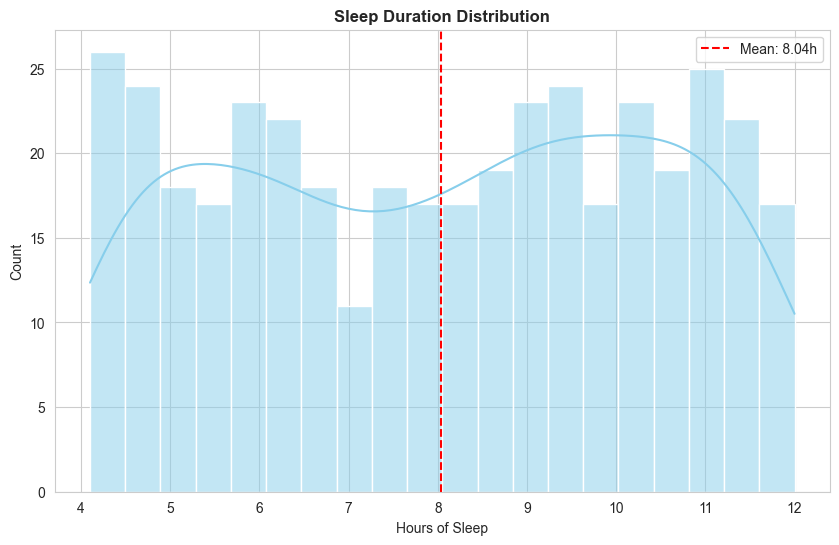

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Sleep Duration', bins=20, kde=True, color='skyblue')
ax.set_title('Sleep Duration Distribution', fontweight='bold')
ax.set_xlabel('Hours of Sleep')
ax.axvline(df['Sleep Duration'].mean(), color='red', linestyle='--',
           label=f'Mean: {df["Sleep Duration"].mean():.2f}h')
ax.legend()
plt.show()

2. Sleep Quality Distribution
This count plot shows the frequency of each sleep quality rating. We can see which quality ratings are most and least common.

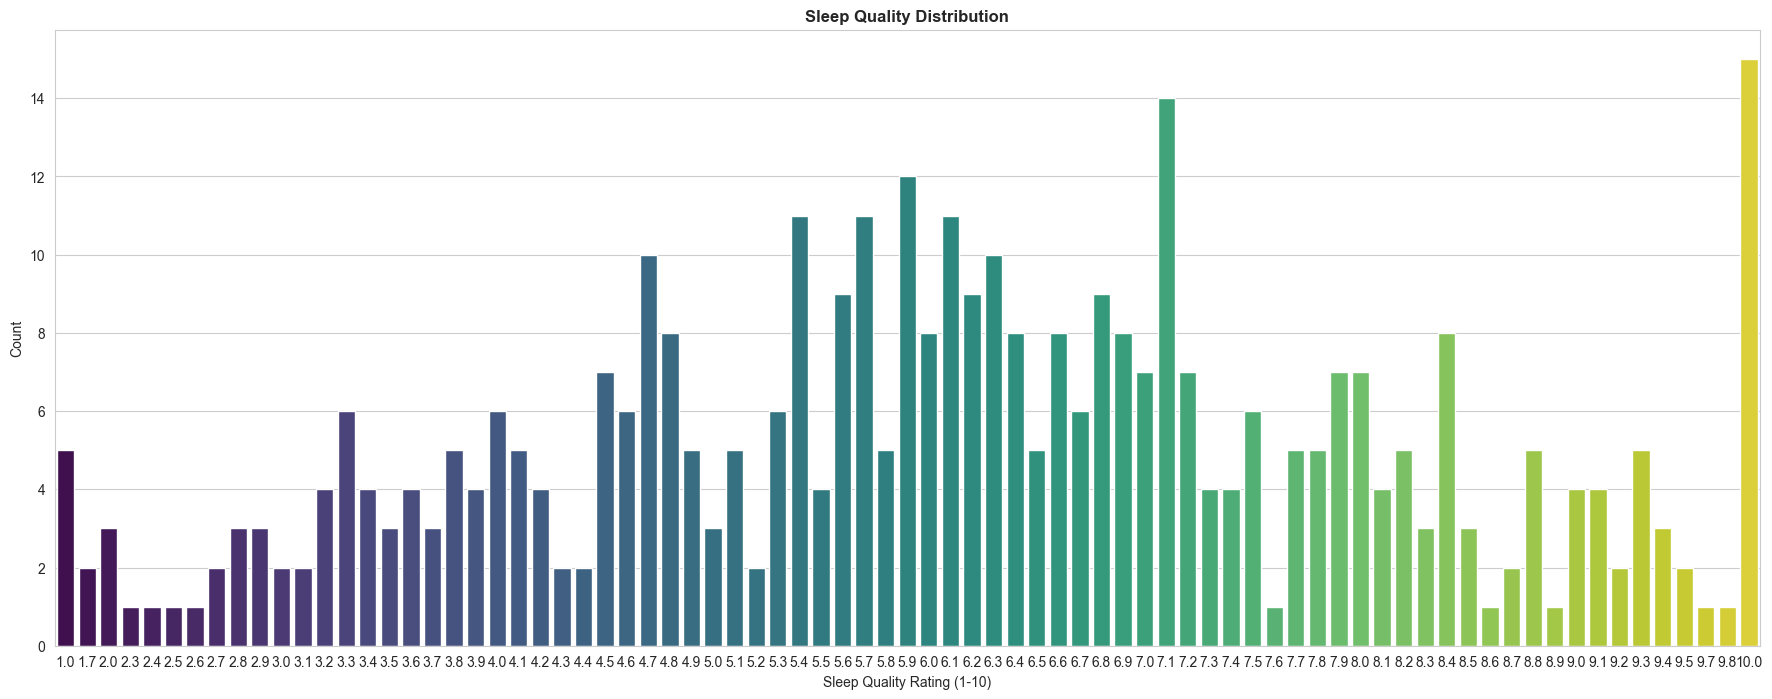

In [68]:
plt.figure(figsize=(22, 8))
ax = sns.countplot(data=df, x='Quality of Sleep', palette='viridis')
ax.set_title('Sleep Quality Distribution', fontweight='bold')
ax.set_xlabel('Sleep Quality Rating (1-10)')
ax.set_ylabel('Count')
plt.show()

3. Sleep Disorder Distribution
This pie chart illustrates the proportion of individuals with 'None', 'Insomnia', or 'Sleep Apnea'.

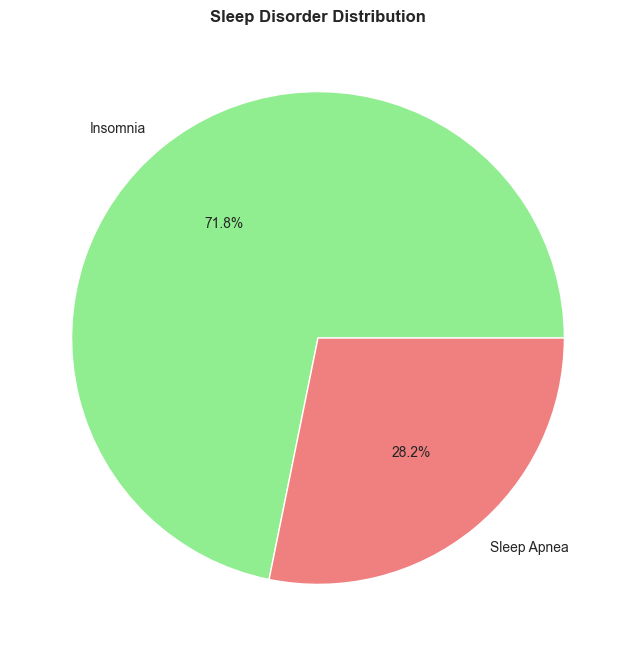

In [69]:
plt.figure(figsize=(8, 8)) # Pie charts look good square
disorder_counts = df['Sleep Disorder'].value_counts()
plt.pie(disorder_counts.values, labels=disorder_counts.index, autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Sleep Disorder Distribution', fontweight='bold')
plt.show()

4. Age Distribution
This histogram shows the age distribution of the participants in the dataset, with the mean age marked.

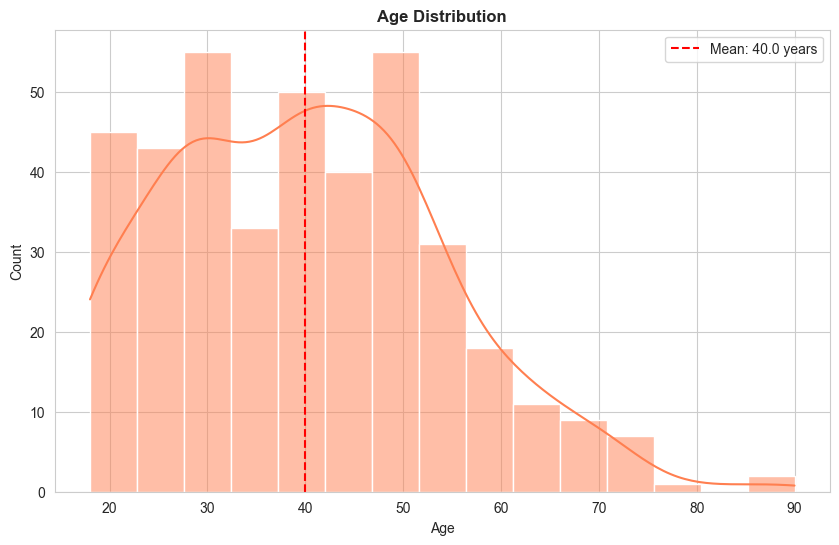

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Age', bins=15, kde=True, color='coral')
ax.set_title('Age Distribution', fontweight='bold')
ax.set_xlabel('Age')
ax.axvline(df['Age'].mean(), color='red', linestyle='--',
           label=f'Mean: {df["Age"].mean():.1f} years')
ax.legend()
plt.show()

5. Physical Activity Level Distribution
This plot shows the distribution of daily physical activity in minutes, helping us understand the general activity level of the group.

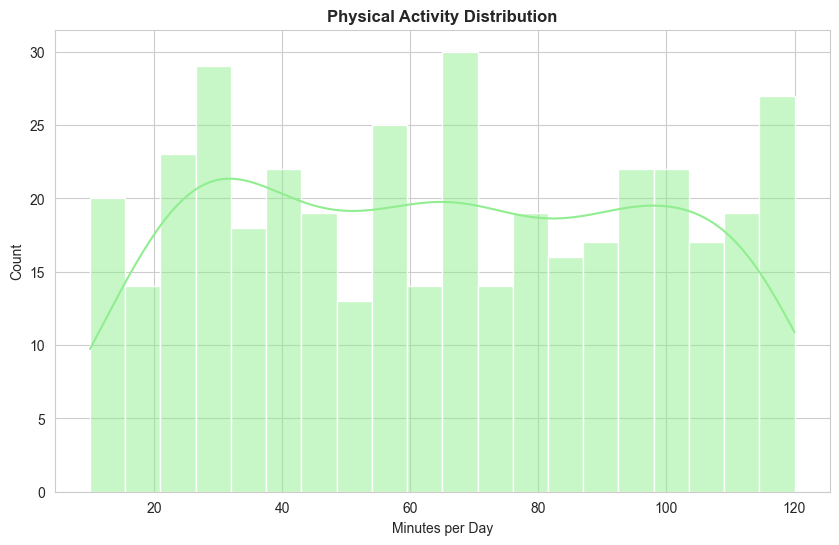

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Physical Activity Level', bins=20, kde=True, color='lightgreen')
ax.set_title('Physical Activity Distribution', fontweight='bold')
ax.set_xlabel('Minutes per Day')
plt.show()

6. Stress Level Distribution
This count plot shows the frequency of self-reported stress levels, from 1 (low) to 10 (high).

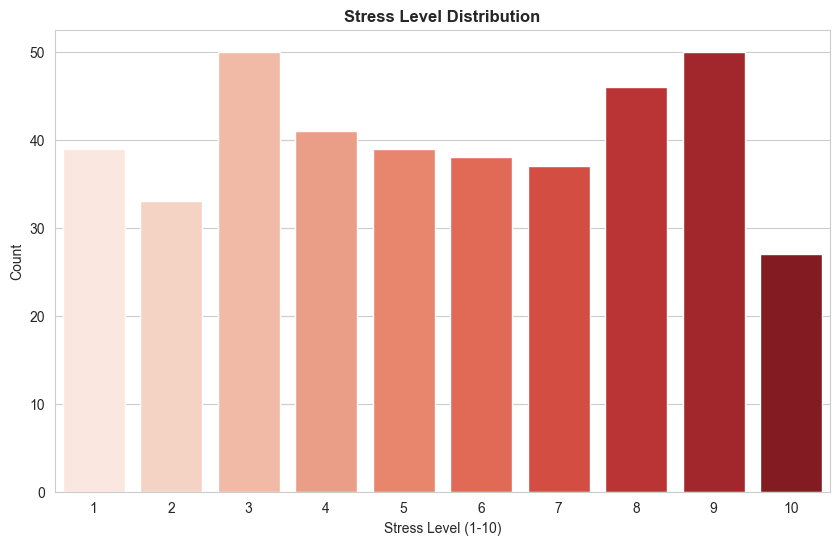

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Stress Level', palette='Reds')
ax.set_title('Stress Level Distribution', fontweight='bold')
ax.set_xlabel('Stress Level (1-10)')
ax.set_ylabel('Count')
plt.show()

7. BMI Category Distribution
This bar chart displays the count of individuals in each BMI category, ordered logically from 'Underweight' to 'Obese'

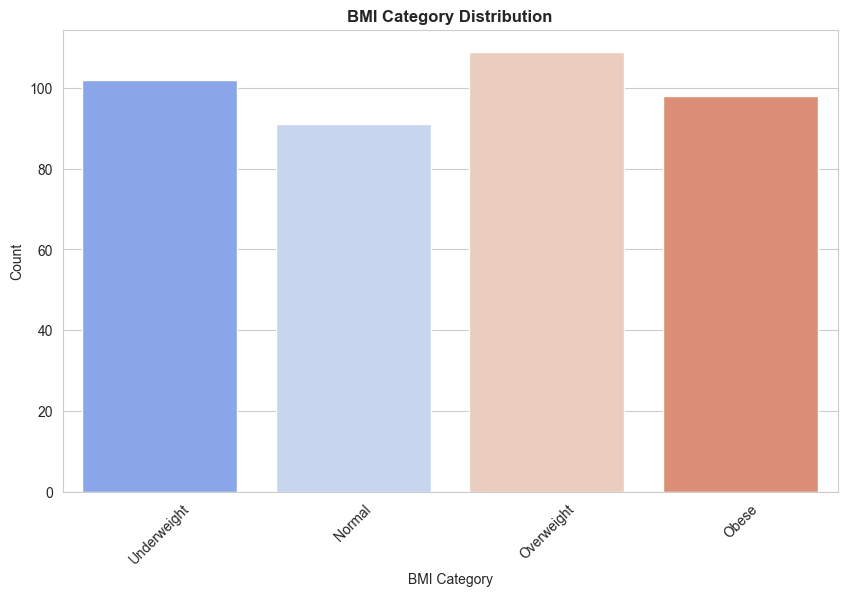

In [73]:
# Data prep for BMI plot
bmi_data = df['BMI Category'].value_counts()
# Define a logical order
bmi_order = ['Underweight', 'Normal', 'Normal Weight', 'Overweight', 'Obese']
# Filter for categories actually in the data
actual_bmi_order = [cat for cat in bmi_order if cat in bmi_data.index]
# Add any unexpected categories at the end
for cat in bmi_data.index:
    if cat not in actual_bmi_order:
        actual_bmi_order.append(cat)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bmi_data.index, y=bmi_data.values, palette='coolwarm', order=actual_bmi_order)
ax.set_title('BMI Category Distribution', fontweight='bold')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
plt.show()

8. Gender Distribution
A simple bar chart showing the number of 'Male' and 'Female' participants.

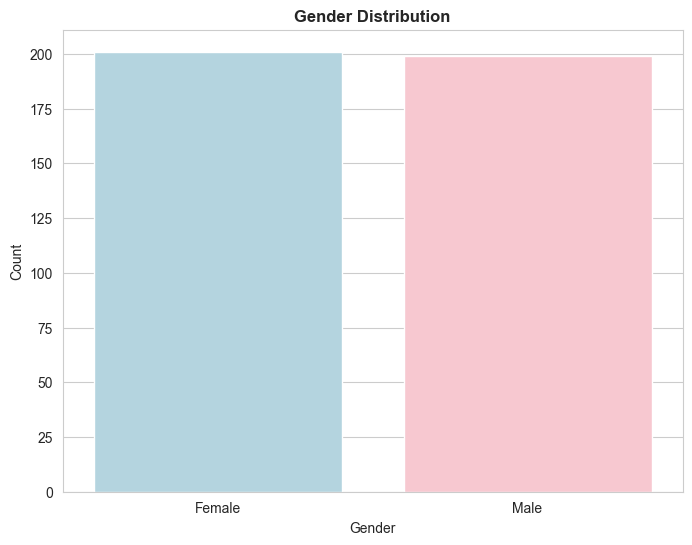

In [74]:
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
# Using sns.barplot is cleaner and consistent
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['lightblue', 'pink'])
ax.set_title('Gender Distribution', fontweight='bold')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show()

9. Top 10 Occupations
This horizontal bar chart shows the 10 most common occupations in the dataset, which is useful for understanding the demographic context.

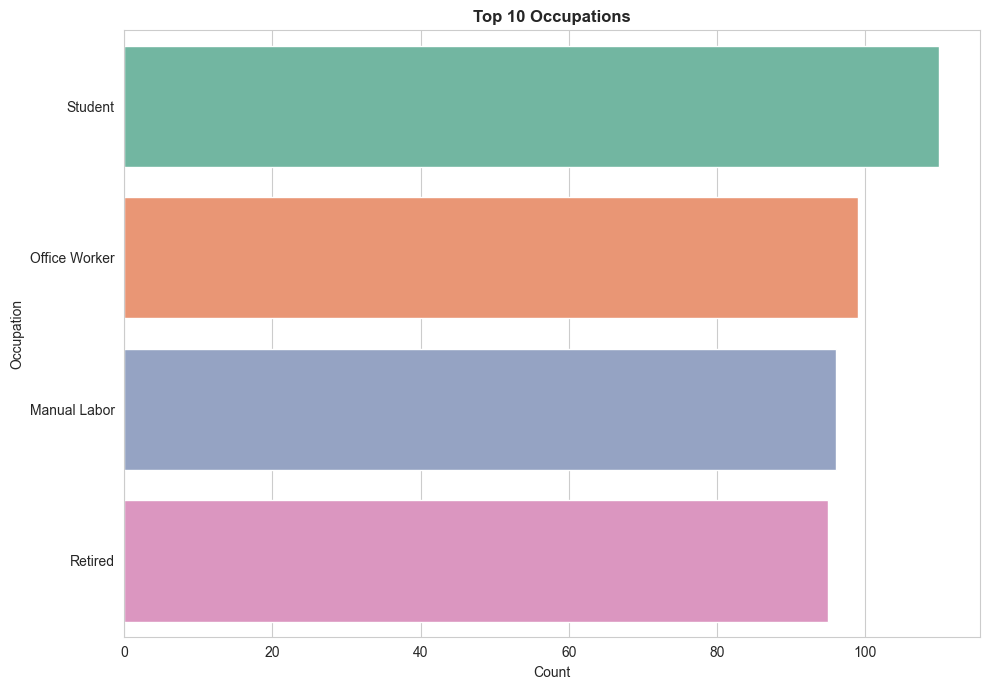

In [75]:
plt.figure(figsize=(10, 7))
top_occupations = df['Occupation'].value_counts().head(10)
ax = sns.barplot(y=top_occupations.index, x=top_occupations.values, palette='Set2')
ax.set_title('Top 10 Occupations', fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Occupation')
plt.tight_layout() # Good for long occupation names
plt.show()


CORRELATION ANALYSIS


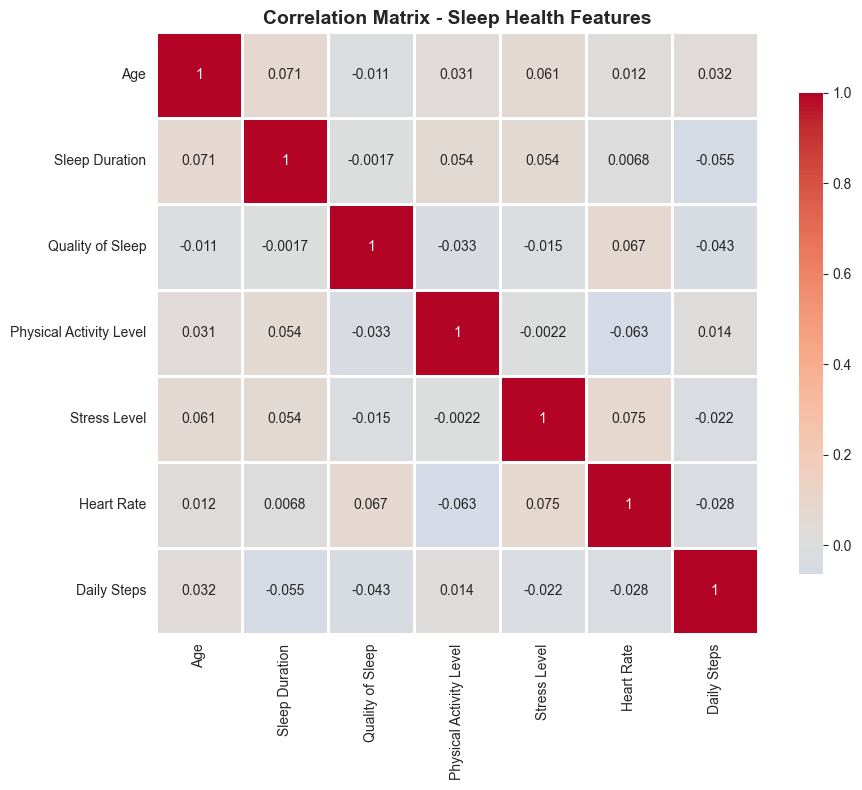


Correlations with Quality of Sleep:
Quality of Sleep           1.000000
Heart Rate                 0.067353
Sleep Duration            -0.001706
Age                       -0.011203
Stress Level              -0.015295
Physical Activity Level   -0.032573
Daily Steps               -0.043098
Name: Quality of Sleep, dtype: float64


In [76]:

# ===========================
# 6. CORRELATION ANALYSIS
# ===========================

print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# This list of numerical columns will now work perfectly
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                  'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

correlation_matrix = df[numerical_cols].corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Sleep Health Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strong correlations with Quality of Sleep
print("\nCorrelations with Quality of Sleep:")
sleep_quality_corr = correlation_matrix['Quality of Sleep'].sort_values(ascending=False)
print(sleep_quality_corr)


In [77]:

# ===========================
# 7. KEY INSIGHTS SUMMARY
# ===========================

print("\n" + "=" * 60)
print("KEY INSIGHTS FROM EDA")
print("=" * 60)

# All these f-string print statements will now work
print(f"""
1. DATASET SIZE:
   - Total Records: {len(df)}
   - Features: {df.shape[1]}
   
2. SLEEP PATTERNS:
   - Average Sleep Duration: {df['Sleep Duration'].mean():.2f} hours
   - Average Sleep Quality: {df['Quality of Sleep'].mean():.2f}/10
   - Sleep Quality Range: {df['Quality of Sleep'].min()} to {df['Quality of Sleep'].max()}
   
3. LIFESTYLE FACTORS:
   - Average Physical Activity: {df['Physical Activity Level'].mean():.0f} min/day
   - Average Stress Level: {df['Stress Level'].mean():.2f}/10
   - Average Daily Steps: {df['Daily Steps'].mean():.0f}
   
4. SLEEP DISORDERS:
   - Percentage with disorders: {(df['Sleep Disorder'] != 'None').sum() / len(df) * 100:.1f}%
   - Most common disorder: {df[df['Sleep Disorder'] != 'None']['Sleep Disorder'].mode()[0] if (df['Sleep Disorder'] != 'None').any() else 'N/A'}
   
5. DEMOGRAPHIC:
   - Age Range: {df['Age'].min()} to {df['Age'].max()} years
   - Average Age: {df['Age'].mean():.1f} years
   - Gender Distribution: {dict(df['Gender'].value_counts())}
""")

print("\n" + "=" * 60)
print("NEXT STEPS")
print("=" * 60)
print("""
1. Data Preprocessing:
   - Handle Blood Pressure column (split into systolic/diastolic)
   - Encode categorical variables
   - Feature engineering
   - Outlier detection and treatment

2. Advanced Analysis:
   - Occupation-based sleep patterns
   - Stress-sleep correlation deep dive
   - BMI impact on sleep disorders
   - Age group analysis

3. Prepare data for ML models
""")


KEY INSIGHTS FROM EDA

1. DATASET SIZE:
   - Total Records: 400
   - Features: 13

2. SLEEP PATTERNS:
   - Average Sleep Duration: 8.04 hours
   - Average Sleep Quality: 6.13/10
   - Sleep Quality Range: 1.0 to 10.0

3. LIFESTYLE FACTORS:
   - Average Physical Activity: 65 min/day
   - Average Stress Level: 5.47/10
   - Average Daily Steps: 11077

4. SLEEP DISORDERS:
   - Percentage with disorders: 100.0%
   - Most common disorder: Insomnia

5. DEMOGRAPHIC:
   - Age Range: 18 to 90 years
   - Average Age: 40.0 years
   - Gender Distribution: {'Female': 201, 'Male': 199}


NEXT STEPS

1. Data Preprocessing:
   - Handle Blood Pressure column (split into systolic/diastolic)
   - Encode categorical variables
   - Feature engineering
   - Outlier detection and treatment

2. Advanced Analysis:
   - Occupation-based sleep patterns
   - Stress-sleep correlation deep dive
   - BMI impact on sleep disorders
   - Age group analysis

3. Prepare data for ML models

